# Customer Behavior Analysis

## Primary Questions:

### - How can we improve ou sales?

- What our customers are looking for on Amazon?

- Can we separate our customers in groups and recommendate them what other on the same group bhought?

In [211]:
import pandas as pd
import numpy as np

In [212]:
df = pd.read_csv('Amazon Customer Behavior Survey.csv')
df.head(10)

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy
5,2023/06/04 6:01:59 PM GMT+5:30,21,Female,Less than once a month,Clothing and Fashion,No,Rarely,categories,Multiple pages,1,...,Never,No,Heavily,Yes,5,No,5,2,Wide product selection,Product quality and accuracy
6,2023/06/04 6:31:41 PM GMT+5:30,22,Female,Less than once a month,Clothing and Fashion,No,Rarely,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,3,Sometimes,3,3,Wide product selection,Shipping speed and reliability
7,2023/06/04 7:13:12 PM GMT+5:30,21,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion,No,Rarely,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Sometimes,3,Sometimes,1,3,Competitive prices,Shipping speed and reliability
8,2023/06/04 7:23:21 PM GMT+5:30,20,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Sometimes,Few times a month,Keyword,First page,1,...,Often,No,Moderately,Yes,2,Yes,2,2,Wide product selection,Reducing packaging waste
9,2023/06/04 7:33:12 PM GMT+5:30,23,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,No,Rarely,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,3,Yes,3,4,Wide product selection,Product quality and accuracy


### Checking and cleaning the dataset

In [213]:
df.shape

(602, 23)

In [214]:
print(f'Valores na: {df.isna().sum()}\n')
print('===========================================================')
print(f'\n\nColunas: {df.columns}')

Valores na: Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas   

In [215]:
df = df.fillna(0)

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   602 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

In [217]:
lista_obj_col = ['Add_to_Cart_Browsing', 'Cart_Completion_Frequency', 'Cart_Abandonment_Factors',\
    'Saveforlater_Frequency', 'Review_Left', 'Review_Reliability', 'Review_Helpfulness',\
    'Recommendation_Helpfulness', 'Service_Appreciation', 'Improvement_Areas']

for i in lista_obj_col:
    print('\n===========================================================\
=================================================================')
    print(f'\n{i}: {(df[i]).unique()}')



Add_to_Cart_Browsing: ['Yes' 'Maybe' 'No']


Cart_Completion_Frequency: ['Sometimes' 'Often' 'Rarely' 'Never' 'Always']


Cart_Abandonment_Factors: ['Found a better price elsewhere' 'High shipping costs'
 'Changed my mind or no longer need the item' 'others']


Saveforlater_Frequency: ['Sometimes' 'Rarely' 'Never' 'Often' 'Always']


Review_Left: ['Yes' 'No']


Review_Reliability: ['Occasionally' 'Heavily' 'Moderately' 'Never' 'Rarely']


Review_Helpfulness: ['Yes' 'No' 'Sometimes']


Recommendation_Helpfulness: ['Yes' 'Sometimes' 'No']


Service_Appreciation: ['Competitive prices' 'Wide product selection'
 'User-friendly website/app interface' '.' 'Customer service '
 'Product recommendations' 'Customer service' 'Quick delivery'
 'All the above']


Improvement_Areas: ['Reducing packaging waste' 'Product quality and accuracy'
 'Shipping speed and reliability' 'Customer service responsiveness' '.'
 'Nothing' 'better app interface and lower shipping charges' 'Nil'
 'Add more familiar b

In [218]:
df['Add_to_Cart_Browsing'].value_counts()

Add_to_Cart_Browsing
Maybe    248
Yes      216
No       138
Name: count, dtype: int64

In [219]:
def count_col_values(df, col):
    sub_df = df[col].value_counts()
    sub_df = pd.DataFrame(sub_df)
    sub_df.columns = ['Count']
    return sub_df

# Teste: count_col_values(df, 'Add_to_Cart_Browsing')

In [220]:
# Correcting datetype
df['Timestamp'] = df['Timestamp'].str.replace(' GMT+5:30', '', regex=False)

df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y/%m/%d %I:%M:%S %p',
                                 errors='coerce')

In [221]:
df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023-06-04 13:28:19,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023-06-04 14:30:44,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023-06-04 17:04:56,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023-06-04 17:13:00,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023-06-04 17:28:06,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


### Making some Analysis

In [222]:
import matplotlib.pyplot as plt
import plotly.express as px

In [223]:
df.columns

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas'],
      dtype='object')

In [224]:
def process_improvement_areas(df):
    sub_df = count_col_values(df, 'Improvement_Areas')  # Usar a função de contagem

    # Resetar o índice para transformar o índice atual ('Improvement_Areas') em uma coluna normal
    sub_df = sub_df.reset_index()

    # Renomear a coluna do índice
    sub_df.rename(columns={'index': 'Improvement_Areas'}, inplace=True)

    # Substituir todas as categorias com Count == 1 por "Others"
    sub_df.loc[sub_df['Count'] == 1, 'Improvement_Areas'] = 'Others'

    # Recalcular os valores, somando todos os 'Others'
    sub_df = sub_df.groupby('Improvement_Areas')['Count'].sum().reset_index()    sub_df.sort_values(by='Count', ascending=True)
    
    return sub_df

In [225]:
df_improvement = process_improvement_areas(df)

In [226]:
df_improvement

,Improvement_Areas,Count
0,Customer service responsiveness,217
1,Product quality and accuracy,159
2,Reducing packaging waste,133
3,Shipping speed and reliability,79
4,Others,14


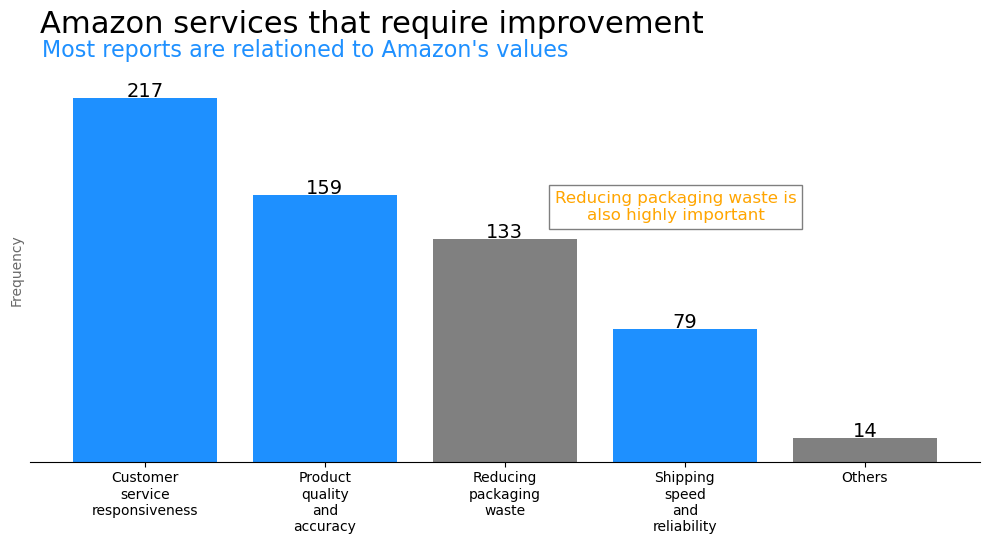

In [307]:
# Plotting the graph
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(df_improvement['Improvement_Areas'], df_improvement['Count'],
       color=['dodgerblue', 'dodgerblue', 'grey','dodgerblue', 'grey'] )

# Removing lines
ax.set_yticks([])
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# adding values to columns
for i, v in enumerate(df_improvement['Count']):
    ax.text(i, v + 0.5, str(v), ha='center', color='black', fontsize=14)

# Title
plt.title('Amazon services that require improvement',  fontweight='roman', 
          fontsize=22, x=0.36, y=1.1)

plt.suptitle("Most reports are relationed to Amazon's values", x=0.31, y=0.85, 
             fontweight='light', color='dodgerblue', fontsize=16)

ax.set_ylabel('Frequency', color='dimgray')
ax.set_xlabel('')

# Ajustando as variáveis do eixo X
new_labels = [label.replace(' ', '\n') for label in df_improvement['Improvement_Areas']]
ax.set_xticks(range(len(new_labels)))  # Ajustar ticks
ax.set_xticklabels(new_labels, ha='center')

# Adicionar insights ao gráfico
insight_text = "Reducing packaging waste is\nalso highly important"
ax.text(2.95, max(df_improvement['Count']) * 0.7, insight_text, 
        ha='center', va='center', fontsize=12, color='orange', 
        bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

In [ ]:
# How does reducing these complaints can improve our sales?
# 'Shopping_Satisfaction', 'Service_Appreciation', 'Purchase_Frequency'